# Engenharia do Conhecimento 2022/2023

## TP04: Linear models for Regression and Classification

*A Machine Learning Tutorial by Andre Falcao (DI/FCUL 2021-2022)*

*Revised by Catia Pesquita (2022-2023) and by Luís Correia (2023-2024)*

### Summary

1. The essence of Linear Regression
2. Linear Regression in Scikit-Learn
3. Regularized Models: Ridge Regression and Lasso
4. Logistic Regression for Classification 


## 1. The essence of Linear Regression

### 1.1. Computing Linear regression manually


We know that the parameters of a linear model can be computed according to the equation

$\beta = (X^T.X)^{-1}.X^T.Y$ &emsp; &emsp; &emsp; (1)

Let's check it out for the [diabetes dataset form the toy examples of scikit learn](https://scikit-learn.org/stable/datasets/toy_dataset.html) that has 10 independent variables


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
X_diabetes, y_diabetes=load_diabetes(return_X_y=True)

#show data set, with target values in first column
pd.DataFrame(X_diabetes, y_diabetes)

,0,1,2,3,4,5,6,7,8,9
151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
178.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
104.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
132.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
220.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


To use this procedure we first need to add one `[1]` column to the whole dataset that will emcompass the bias of the model (intercept)

In [5]:
X1 = np.insert(X_diabetes, 0, 1, axis=1)
X1.shape
pd.DataFrame(X1)

,0,1,2,3,4,5,6,7,8,9,10
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,1.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...,...
437,1.0,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,1.0,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,1.0,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,1.0,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


Now we will divide the full dataset into training and testing

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X1, y_diabetes, test_size=0.2, random_state=22)


the following procedure just computes the Beta parameters by sequentially solving equation (1) above

In [7]:
Xtt=np.transpose(X_train) #Xtt - the transposed X matrix (XT)
print(Xtt.shape) #<-check the matrix dimensions
gram=np.dot(Xtt, X_train) #the dot product between XT and X (XT.X)
print(gram.shape) #<-check the matrix dimensions
gram_inv=np.linalg.inv(gram) #now we invert: (XT.X)^-1
print(gram_inv.shape) #<-check the matrix dimensions
X_part = np.dot(gram_inv,Xtt) #the dot product (XT.X)^-1 .XT
print(X_part.shape) #<-check the matrix dimensions 
Beta_est=np.dot(X_part, y_train) #and the final dot product with the output vector XT (XT.X)^-1 .XT .Y

print(Beta_est) #the values of all betas for 0...N

#print("The bias is: %9.3f" % Beta_est[0]) #this is the intercept, beta_zero, or alpha 
print("The parameters are (notice that the first, B0, is the intercept): ") #the coefficients 
for i, beta in enumerate(Beta_est[0:]):
    print("\t B%2d -> %9.3f"% (i, beta))


(11, 353)
(11, 11)
(11, 11)
(11, 353)
[ 151.34554772   28.58297885 -260.7460662   494.21420338  294.55710928
 -911.28612744  601.93675888   64.93690777  140.09313478  813.06920641
   76.14511679]
The parameters are (notice that the first, B0, is the intercept): 
	 B 0 ->   151.346
	 B 1 ->    28.583
	 B 2 ->  -260.746
	 B 3 ->   494.214
	 B 4 ->   294.557
	 B 5 ->  -911.286
	 B 6 ->   601.937
	 B 7 ->    64.937
	 B 8 ->   140.093
	 B 9 ->   813.069
	 B10 ->    76.145


### 1.2 Predictions with the linear regression model

Making predictions is trivial. It is just a matrix multiplication of the parameters with the dataset for which we want to make predictions

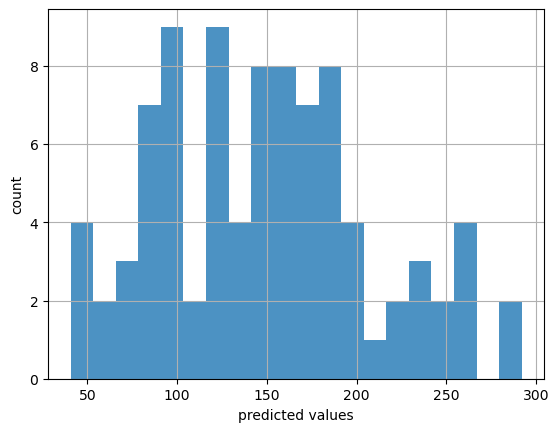

In [9]:
import matplotlib.pyplot as plt
#computes predicted values by taking the x values and muliplying be the corresponding beta coefficients
my_preds=np.dot(X_test,Beta_est) 

#histogram of predicted values
plt.hist(my_preds, bins=20, alpha=.8)
plt.xlabel("predicted values")
plt.ylabel("count")
plt.grid()
plt.show()

Let's compute some usual regression statistics

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

def printRegStatistics(truth, preds):
    print("The R2 is: ", r2_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

printRegStatistics(y_test, my_preds)

The R2 is:  0.4800233155139709
The rmse is:  56.46066160675168
The Correlation Score is is: 0.6968 (p-value=3.359025e-14)

The Maximum Error is is:  157.19345984193907
The Mean Absolute Error is:  43.67689452749924


And compare graphically the results to the actual y values (y_test) 

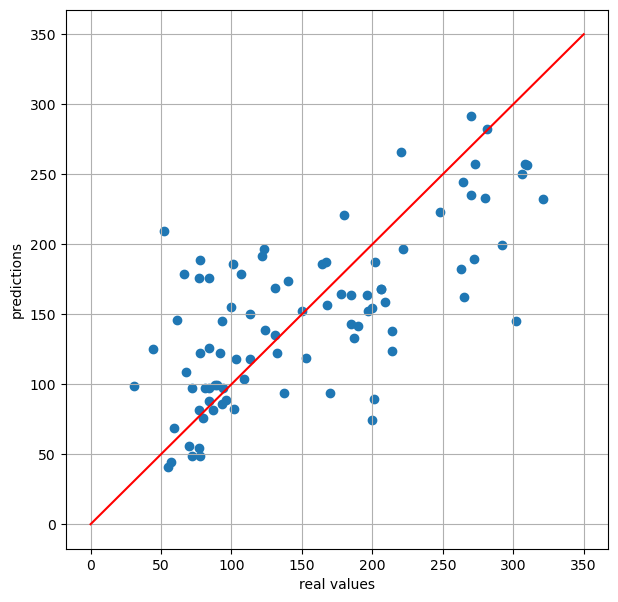

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, my_preds)
plt.grid()
#this is the 45degrees angle. The closer the predictions approach this, the better the model
plt.plot([0, 350], [0, 350], c="r")
plt.xlabel("real values")
plt.ylabel("predictions")
plt.show()

## 2. Linear regression with Python libraries

### 2.1 Using scikit-learn

The only difference to the above procedure that we have used for fitting our model is that here we will use the original X matrix and not X1 (which has an extra **ONE** column), so we will need to do a new train-test split this time with the original data

In [14]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=22)


reg = LinearRegression().fit(X_train, y_train)

print("The bias is: ",  reg.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(reg.coef_):
    print("\t B%2d -> %9.3f"% (i+1, beta))
    
print("The score is: ", reg.score(X_train, y_train))

The bias is:  151.34554771656752
The other parameters are: 
	 B 1 ->    28.583
	 B 2 ->  -260.746
	 B 3 ->   494.214
	 B 4 ->   294.557
	 B 5 ->  -911.286
	 B 6 ->   601.937
	 B 7 ->    64.937
	 B 8 ->   140.093
	 B 9 ->   813.069
	 B10 ->    76.145
The score is:  0.5249792108942959


Compare the results of the parameter values with the ones computed above, at the end of 1.1. They should be exactly the same! A linear regression is a stable model - always gives the same result.

## Exercise 1
### 1.1 A couple of questions

In [17]:
print("The score displayed above is the value of metric: ", end=" ")
#Return the coefficient of determination of the prediction. The coefficient of determination or R"2, 
#e closer the R-squared value is to 1, the better the model fits the data
print("**R-squared**")
print("")
print("It has been computed over the: ", end=" ")
#
print("**training**", "set")

The score displayed above is the value of metric:  **R-squared**

It has been computed over the:  **training** set


### ... finishing the comparisons

Similarly let's examine the predictions graphically (should also be identical to previous)

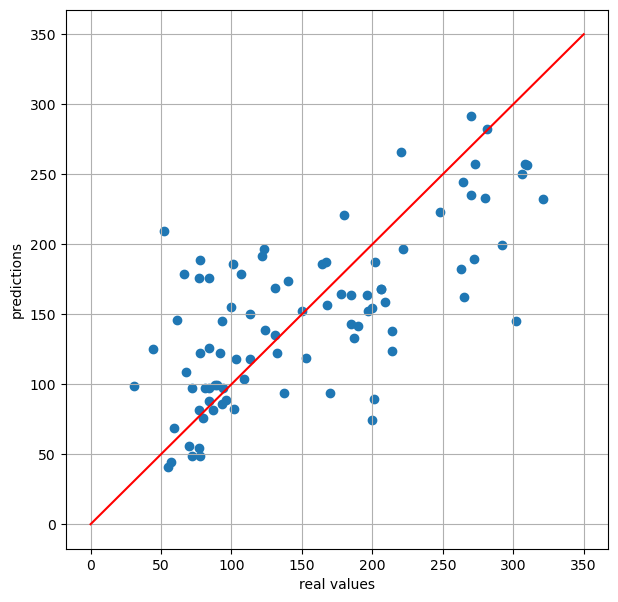

In [18]:
preds=reg.predict(X_test)
plt.figure(figsize=(7,7))
plt.scatter(y_test, preds)
plt.grid()
plt.plot([0, 350], [0, 350], c="r")
plt.xlabel("real values")
plt.ylabel("predictions")
plt.show()

## 3. Regularised linear models

Regularised models impose boundaries on the fitted parameters, so that it is possible to have sensitivity on which variables appear most relevant for explaining the dependent `y`. The problem is that these boundaries add constraints and simple optimization of the MSE is no longer possible, requiring more complex fitting algorithms

There are essentially 3 regularised linear models
* Ridge Regression
* Lasso (Least Absolute Shrinkage and Selection Operator)
* Elastic nets

For this class we will only discuss Ridge and Lasso, as Elastic nets are a weighted compromise betwen these two approaches. 

### 3.1 Ridge Regression

Ridge regression applies L2 regularization, that is, it minimizes not only the MSEs (mean squared errors), but also the squared values of the parameters estimator, thus:

$cost(\beta) = MSE(\beta) + \frac{\alpha}{2}\sum^{n}_{i=1}{\beta_i^2}$

The value of $\alpha$ defines how much to penalize the parameter values. This penalty will emphasize the importance of each variable in its contribution for explaining `y` Higher values of $\alpha$, will cause smaller $\beta$

Selecting a value of  $\alpha=10$

In [19]:
from sklearn.linear_model import Ridge, Lasso
ridge = Ridge(alpha=10, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(ridge.coef_):
    print("\t B%2d -> %9.3f"% (i+1, beta))
    

The bias is:  151.95154242424965
The other parameters are: 
	 B 1 ->    19.462
	 B 2 ->    -1.838
	 B 3 ->    61.118
	 B 4 ->    41.901
	 B 5 ->    19.378
	 B 6 ->    14.009
	 B 7 ->   -40.160
	 B 8 ->    42.053
	 B 9 ->    61.030
	 B10 ->    36.724


We can of course compute the general regression statistics for the regularized model

In [20]:
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The R2 is:  0.15857620418887242
The rmse is:  71.82264960150157
The Correlation Score is is: 0.6183 (p-value=1.076686e-10)

The Maximum Error is is:  157.88033391771796
The Mean Absolute Error is:  62.86309372911052


Changing the $\alpha$ value will have a dramatic impact on the parameters estimated as well as on the regression results. for instance for  $\alpha=0.1$ we will have

In [21]:
ridge = Ridge(alpha=0.1, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(ridge.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  151.32314982609134
The other parameters are: 
	 B01 ->    38.485
	 B02 ->  -219.579
	 B03 ->   464.996
	 B04 ->   268.191
	 B05 ->   -85.624
	 B06 ->   -50.545
	 B07 ->  -244.509
	 B08 ->   106.427
	 B09 ->   441.043
	 B10 ->    93.668
The R2 is:  0.4817911607887969
The rmse is:  56.364600860782545
The Correlation Score is is: 0.6960 (p-value=3.680097e-14)

The Maximum Error is is:  160.27371789038853
The Mean Absolute Error is:  43.87511286801874


For very low $\alpha$ values the model is equivalent to the unconstrained model

In [22]:
ridge = Ridge(alpha=0.0001, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  ridge.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(ridge.coef_):
    print("\t B%2d -> %9.3f"% (i+1, beta))
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  151.3435710922541
The other parameters are: 
	 B 1 ->    28.669
	 B 2 ->  -260.701
	 B 3 ->   494.344
	 B 4 ->   294.458
	 B 5 ->  -898.242
	 B 6 ->   591.736
	 B 7 ->    58.822
	 B 8 ->   138.228
	 B 9 ->   808.060
	 B10 ->    76.189
The R2 is:  0.4800824240048672
The rmse is:  56.457452425023156
The Correlation Score is is: 0.6969 (p-value=3.344359e-14)

The Maximum Error is is:  157.21615496286995
The Mean Absolute Error is:  43.67620108797183


Now is there any value of $\alpha$ that actually is better for the current train/test partition? Let's check the rmse for different values and plot the results


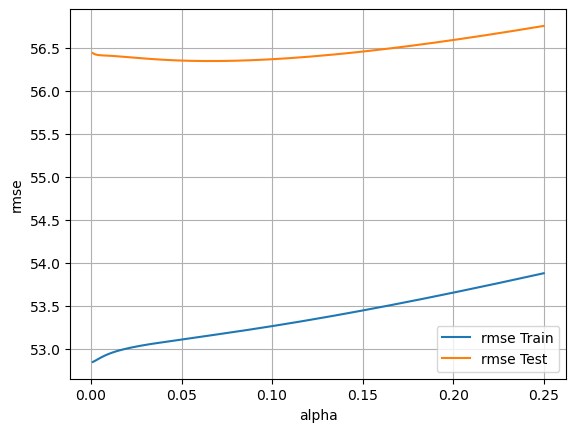

In [23]:
#this is a simple cross-validation

rmse_train = []
rmse_test = []
alphas=2**np.arange(-2,-10,-.05)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    preds_tr=ridge.predict(X_train)
    preds_te=ridge.predict(X_test)
    rmse_train.append(mean_squared_error(y_train, preds_tr, squared=False))
    rmse_test.append(mean_squared_error(y_test, preds_te, squared=False))
    
plt.plot(alphas, rmse_train, label="rmse Train")    
plt.plot(alphas, rmse_test, label="rmse Test") 
plt.xlabel("alpha")
plt.ylabel("rmse")
plt.grid()
plt.legend()
plt.show()

it is possible to inspect the values of the different parameters as $\alpha$ changes

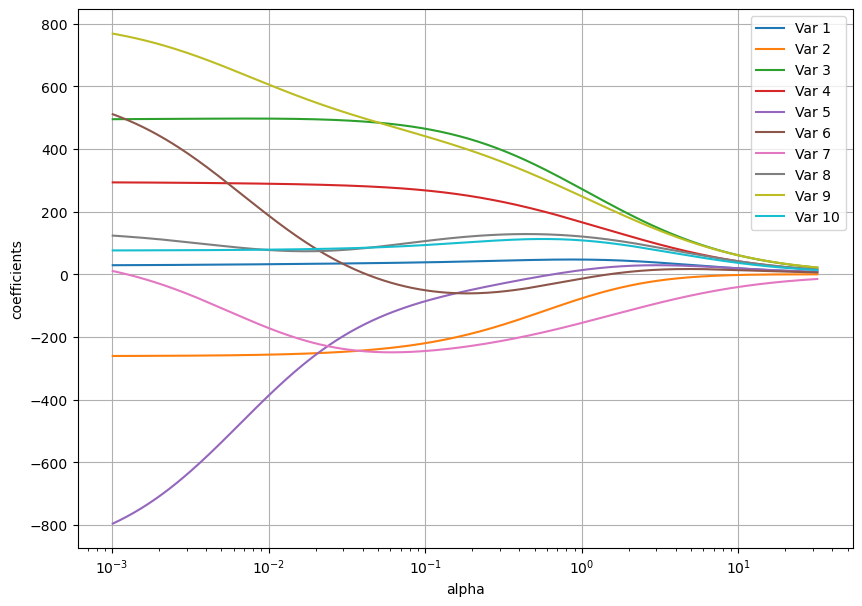

In [24]:
#compute coefficients for many alpha values
coefs=[]

#generate a list of alphas to test between -10 and 5, with a 0.1 interval
#296 different alphas to test, which is more than we tested above
alphas=2**np.arange(5,-10,-.05) 


for alpha in alphas:
    ridge= Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    coefs.append(ridge.coef_)
coefs=np.array(coefs)

#plot results
N,M=X_train.shape #get number of rows(N) which correspond to alphas and columns(M) which correspond to the variables)
plt.figure(figsize=(10,7))
for i in range(M):
    plt.plot(alphas, coefs[:,i], label="Var %d" % (i+1)) #the coefficents of variable i for each alpha value
    
plt.xscale("log")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.grid()
plt.show()

We can use cross-validation to find the best $\alpha$ value

The best alpha is:  0.0034005881378755955


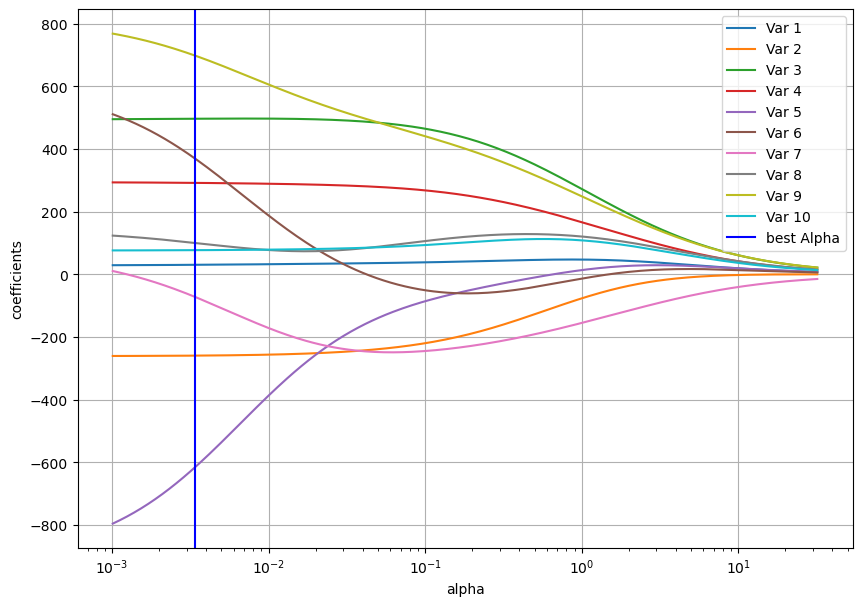

In [25]:
#lets find the best alpha using cross-validation on the training data  
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas = alphas, cv=5).fit(X_train, y_train)
print("The best alpha is: ",ridge_cv.alpha_)

#plot results
N,M=X_train.shape #get number of rows(N) which correspond to alphas and columns(M) which correspond to the variables)
plt.figure(figsize=(10,7))
for i in range(M):
    plt.plot(alphas, coefs[:,i], label="Var %d" % (i+1)) #the coefficents of variable i for each alpha value
plt.axvline(x = ridge_cv.alpha_, color = 'b', label = 'best Alpha')
plt.xscale("log")
plt.legend()
plt.xlabel("alpha")
plt.ylabel("coefficients")
plt.grid()
plt.show()

In [26]:

#Now let's fit the linear regression using the best alpha and evaluate on the test set
ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

The R2 is:  0.48047112269379655
The rmse is:  56.43634423222321
The Correlation Score is is: 0.6971 (p-value=3.250403e-14)

The Maximum Error is is:  157.40038102917217
The Mean Absolute Error is:  43.6693911427725



## Exercise 2:
### Compare the results obtained with alpha=10, alpha=0.0001 and the best alpha. What can you conclude?

In [29]:
print("**<your answer here>**")
#alpha 10
#Now let's fit the linear regression using the best alpha and evaluate on the test set
print("\n\nalpha 10 ")
ridge = Ridge(alpha=10, max_iter=100000).fit(X_train, y_train)
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)
#alpha0.0001
print("\n\nalpha 0.0001 ")
#Now let's fit the linear regression using the best alpha and evaluate on the test set
ridge = Ridge(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)
#alpha best 
#Now let's fit the linear regression using the best alpha and evaluate on the test set
ridge_cv = RidgeCV(alphas = alphas, cv=5).fit(X_train, y_train)
print(" \n\nThe best alpha is: ",ridge_cv.alpha_)
ridge = Ridge(alpha=ridge_cv.alpha_, max_iter=100000).fit(X_train, y_train)
preds=ridge.predict(X_test)
printRegStatistics(y_test, preds)

#R2 value measures the proportion of the variance in the dependent variable that is predictable from the independent variables
#higher R2 values indicate better model performance. Alpha values of 0.0001 and the best alpha 
#(0.0034) yield significantly higher R2 values compared to alpha 10, indicating better model fit


#RMSE measures the average magnitude of the errors between predicted values and observed values.
#Lower RMSE values indicate better model performance.
#Alpha values of 0.0001 and the best alpha result in lower RMSE 


#Correlation Score: This value indicates the strength and direction of the linear relationship between 
#the predicted and actual values. Higher correlation scores suggest a stronger linear relationship. 
#The correlation scores for alpha 0.0001 and the best alpha are higher

#Maximum Error: This represents the largest absolute error between predicted and actual values. 
#Lower values indicate better model accuracy. Alpha 0.0001 has the lowest maximum error.

#Mean Absolute Error (MAE): MAE represents the average absolute difference between predicted and actual values.
#Lower values indicate better model accuracy. Alpha 0.0001 and the best alpha have lower MAE compared to alpha 10, indicating better accuracy.

**<your answer here>**


alpha 10 
The R2 is:  0.15857620418887242
The rmse is:  71.82264960150157
The Correlation Score is is: 0.6183 (p-value=1.076686e-10)

The Maximum Error is is:  157.88033391771796
The Mean Absolute Error is:  62.86309372911052


alpha 0.0001 
The R2 is:  0.4800824240048672
The rmse is:  56.457452425023156
The Correlation Score is is: 0.6969 (p-value=3.344359e-14)

The Maximum Error is is:  157.21615496286995
The Mean Absolute Error is:  43.67620108797183
 

The best alpha is:  0.0034005881378755955
The R2 is:  0.4808563704174261
The rmse is:  56.41541565039917
The Correlation Score is is: 0.6973 (p-value=3.168787e-14)

The Maximum Error is is:  157.75501758531536
The Mean Absolute Error is:  43.661357436648785


### 3.2 The Lasso

The Lasso (Least Absolute Shrinkage and Selection Operator) is similar to Ridge regression but it uses L1 regularization, that is, it minimizes not only the MSEs, but including the modulus values of the parameters estimators, which will have a very important effect on the actual parameters:

$cost(\beta) = MSE(\theta) + \alpha\sum^{n}_{i=1}{|\beta_i|}$

This will make that only really necessary variables will enter the model. Similar to Ridge regression the  $\alpha$ parameter defines how much to penalize the actual parameters. This penalization will emphasize the importance of each variable in its contribution for explaining `y`. 
Higher values of $\alpha$, will cause smaller $\beta$. However different from Ridge regression, due to the nature of the modulus function, for high alpha values only a few variables will enter the model. This is a very important criterion for actually identifying the most important variables in a model.

Selecting a value of  $\alpha=2$, for instance, will only have two variables in the model (\=0), suggesting they are the most important ones for explaining `y`.

In [30]:
L = Lasso(alpha=2, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  L.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(L.coef_):
    print("\t B%2d -> %9.3f"% (i+1, beta))
preds=L.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  151.99442687246025
The other parameters are: 
	 B 1 ->     0.000
	 B 2 ->     0.000
	 B 3 ->    12.061
	 B 4 ->     0.000
	 B 5 ->     0.000
	 B 6 ->     0.000
	 B 7 ->    -0.000
	 B 8 ->     0.000
	 B 9 ->    58.895
	 B10 ->     0.000
The R2 is:  0.041948827987327464
The rmse is:  76.6387443961381
The Correlation Score is is: 0.5717 (p-value=4.866160e-09)

The Maximum Error is is:  167.52300672659933
The Mean Absolute Error is:  66.82337340809498


Making  $\alpha=0.5$ will impact the model deeply, showing now 4 active variables and an apparent increase in the model statistics

In [31]:
L = Lasso(alpha=.5, max_iter=9999999).fit(X_train, y_train)

print("The bias is: ",  L.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(L.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))
preds=L.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  151.649776065227
The other parameters are: 
	 B01 ->     0.000
	 B02 ->    -0.000
	 B03 ->   447.202
	 B04 ->    99.845
	 B05 ->    -0.000
	 B06 ->     0.000
	 B07 ->   -71.681
	 B08 ->     0.000
	 B09 ->   447.765
	 B10 ->     0.000
The R2 is:  0.4432663551596818
The rmse is:  58.42218040443457
The Correlation Score is is: 0.6874 (p-value=1.012965e-13)

The Maximum Error is is:  145.61585359357616
The Mean Absolute Error is:  48.61700385879032


## Exercise 2:
Repeat the procedure above described for Ridge regression, but now adapted for the Lasso.

2.1 Use cross-validation to decide on the best alpha value (suggestion: look for the corresponding function in scikit-learn).

2.2 See how the best alpha value impacts the values of the coefficients. How many are not zero?

2.3 Plot the RMSE vs. alpha values.

2.4 Plot the distribution of alpha values and coefficients.

 

The best alpha is:  0.005706345469161436


The bias is:  151.3077522095413
The other parameters are: 
	 B 1 ->    28.243
	 B 2 ->  -255.198
	 B 3 ->   497.788
	 B 4 ->   290.557
	 B 5 ->  -627.480
	 B 6 ->   380.446
	 B 7 ->   -63.463
	 B 8 ->    97.857
	 B 9 ->   707.865
	 B10 ->    74.806
The R2 is:  0.48169813502784387
The rmse is:  56.36965975229124
The Correlation Score is is: 0.6977 (p-value=3.006827e-14)

The Maximum Error is is:  157.3090509005966
The Mean Absolute Error is:  43.607105456504875


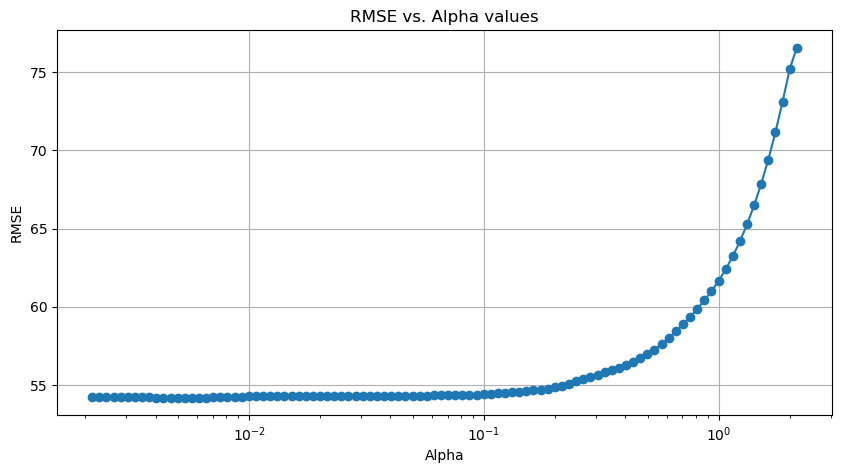

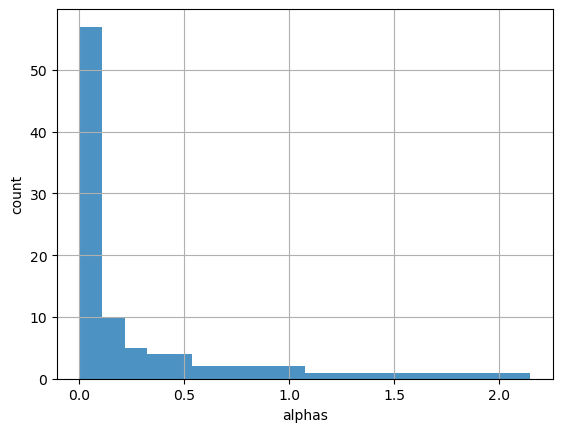

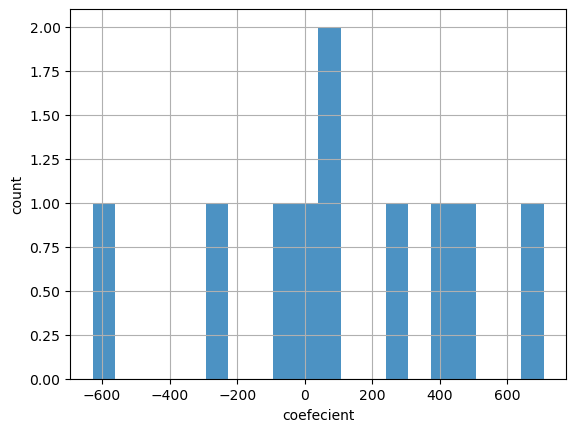

In [39]:
from sklearn.linear_model import LassoCV

#cv=5: This parameter cv stands for cross-validation. In this context, it 
#specifies the number of folds used in cross-validation. Here, cv=5 means 5-fold cross-validation.
#In 5-fold cross-validation, the dataset is split into 5 equal-sized folds. 
lasso_cv = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
print(" \n\nThe best alpha is: ",lasso_cv.alpha_)
L = Lasso(alpha=lasso_cv.alpha_, max_iter=9999999).fit(X_train, y_train)

print("\n\nThe bias is: ",  L.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(L.coef_):
    print("\t B%2d -> %9.3f"% (i+1, beta))
preds=L.predict(X_test)
printRegStatistics(y_test, preds)

#None of the coeficients are 0

#RMSE stands for Root Mean Squared Error. It is a commonly used metric to evaluate the performance of a regression model.
#RMSE measures the average magnitude of the errors between predicted values and observed values.
# Plot RMSE vs. alpha values
plt.figure(figsize=(10, 5))
plt.plot(lasso_cv.alphas_, np.sqrt(lasso_cv.mse_path_).mean(axis=1), marker='o', linestyle='-')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE vs. Alpha values')
plt.xscale('log')
plt.grid(True)
plt.show()

#distribution alphas
plt.hist(lasso_cv.alphas_, bins=20, alpha=.8)
plt.xlabel("alphas")
plt.ylabel("count")
plt.grid()
plt.show()

#distribution coeficient 
plt.hist(lasso_cv.coef_, bins=20, alpha=.8)
plt.xlabel("coefecient")
plt.ylabel("count")
plt.grid()
plt.show()


## 4. Logistic regression

Despite the name, Logistic regression only uses regression methods for fitting, but what is fitted is the probability of belonging to a given class, making this a classification method. This probability function is totaly non-linear.


### 4.1. A very simple explanation of Logistic Regression

We will explain Logistic Regression using articially created data in two different files. One with positive and the other with negative samples.

In [40]:
lines=np.genfromtxt('pos_smps.txt')
poss=np.array([float(lin) for lin in lines]).reshape(-1, 1) #array of positive examples
Np=poss.shape[0] #number of positive examples
lines=np.genfromtxt('neg_smps.txt')
negs=np.array([float(lin) for lin in lines]).reshape(-1, 1) #array of negative examples
Nn=negs.shape[0]  #number of positive examples


yp=np.ones(Np) #array of labels for positive examples
yn=np.zeros(Nn) #array of labels for negative example

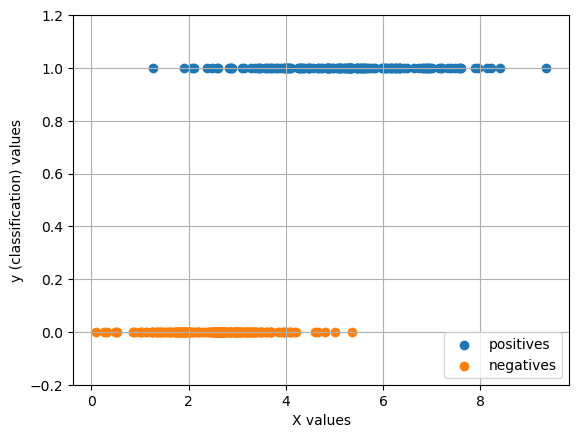

In [41]:
#plot the examples. for positives: y=1, for negatives: y=0
plt.scatter(poss, yp, label="positives")
plt.scatter(negs, yn, label="negatives")
plt.ylim([-0.2, 1.2])
plt.legend()
plt.xlabel("X values")
plt.ylabel("y (classification) values")
plt.grid()
plt.show()

We want to fit a logistic regression that will assign a probability that each instance is positive. That probability cab be defined with a logistic function, with a characteristic sigmoid shape:

$p=\dfrac{1}{1+e^{-(\beta_0+\beta_1.x)}}$

this probability logistic curve is the probability curve. For each value of x, according to this logistic function we can compute the probability of each instance being positive. For this case, as it can be seen the largest the X, the highest the probability of it being positive. 

For illustration purposes as an initial guess, we are just going to assume two estimates for $\beta_0$ and $\beta_1$: 

* $\beta_0= -10.0$
* $\beta_1= 4.0$



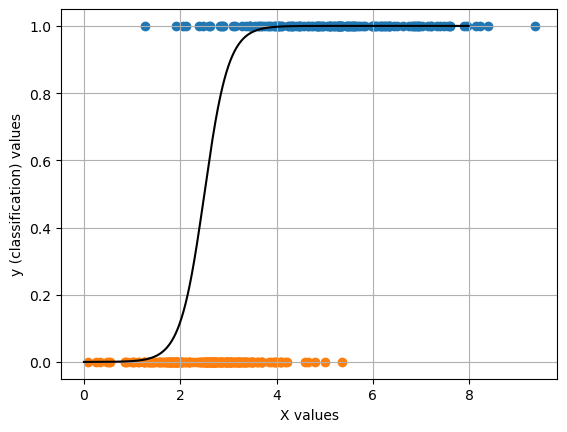

In [43]:
#let's plot
b0 =-10.0
b1 = 4.0
x=np.arange(0, 8, 0.01) #x values to plot the
p= 1/(1+np.exp(-(b0+b1*x))) #probability logistic

plt.plot(x, p, c="k")
plt.scatter(poss, yp)
plt.scatter(negs, yn)
plt.xlabel("X values")
plt.ylabel("y (classification) values")
plt.grid()
plt.show()

We can solve the above equation relative to the probability to find that this curve is in fact a linear representation of the log odds. This *log odds* is the logarithm of the ratio that some instance is positive to the probability of it being negative:

$\log(\frac{p}{1-p})=\beta_0+\beta_1.x$

Now the log odds does not support neither the value of `p=1` neither `p=0`, each case implying $+\infty$  and $-\infty$ respectively. However we can project each point in the new line

This can be represented graphically

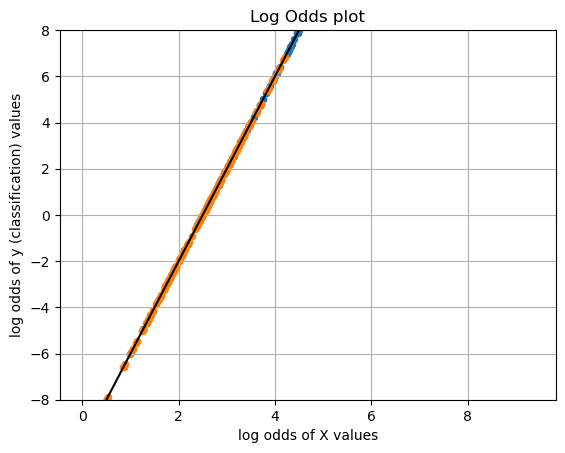

In [44]:
pp_lo = b0 + b1*poss  #log odds for positives
pn_lo = b0 + b1*negs  #log odds for negatives

plt.scatter(poss, pp_lo, s = 20)
plt.scatter(negs, pn_lo, s = 20)

plt.axline((0, b0), slope=b1, c="k") #the linear regression

plt.ylim([-8,8])
plt.title("Log Odds plot")
plt.xlabel("log odds of X values")
plt.ylabel("log odds of y (classification) values")
plt.grid()


We could of course project our samples into the logistic curve. The points above the 0.5 line are the points that should be considered that have a higher likelyhood of being positive, and for those below, have a higher likelyhood of being negative

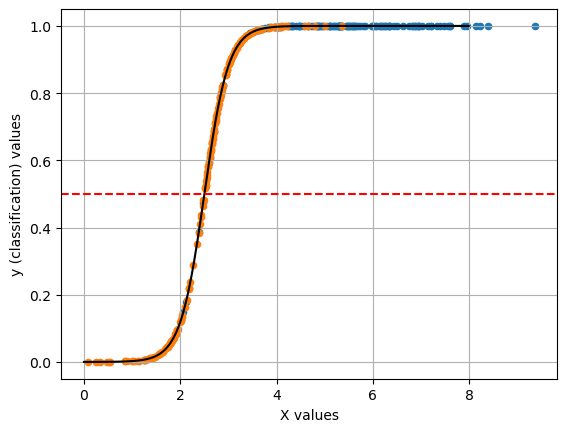

In [48]:
pp= 1/(1+np.exp(-(b0+b1*poss)))
pn= 1/(1+np.exp(-(b0+b1*negs)))
plt.plot(x, p, c="k")
plt.scatter(poss, pp, s = 20)
plt.scatter(negs, pn, s = 20)
plt.axhline(.5,  linestyle="--", color="r")
plt.xlabel("X values")
plt.ylabel("y (classification) values")
plt.grid()
plt.show()


The predictions are then the sigmoid function values resulting from the log odds which was fitted as a straight line.


In [49]:
#let's first put all elements in a common X, y structure for later using with scikit-learn
X=np.vstack((poss, negs))
y=np.hstack((yp, yn))

# let's reserve a test set aside
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

#now we can make predictions with test set
preds=(1/(1+np.exp(-(b0+b1*X_test)))>0.5)
preds=preds.flatten().astype('int32')
preds

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1])

How good is this model? We need to compute the typical statistics

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
import pandas as pd
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(truth, preds)))

printClassResults(y_test, preds)

The Accuracy is:  0.5217
The Precision is:  0.4259
The Recall is:  0.9200
The F1 score is:  0.5823
The Matthews correlation coefficient is:  0.2511

This is the Confusion Matrix
    0   1
0  13  31
1   2  23


## Exercise 3

What if we change one of the parameters?
Use $\beta_0$ = `-6.0`, and  $\beta_1$ = `2.0`
To make new predictions is trivial, we just use the new parameters in the formula to get new predictions and print the results

In [57]:
#complete code here...
#let's first put all elements in a common X, y structure for later using with scikit-learn
X=np.vstack((poss, negs))
y=np.hstack((yp, yn))

# let's reserve a test set aside
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
b0=-6.0
b1=2.0
#now we can make predictions with test set
new_preds=(1/(1+np.exp(-(b0+b1*X_test)))>0.5)
new_preds=preds.flatten().astype('int32')
new_preds
#uncomment the following line to evaluate the new model
printClassResults(y_test, new_preds) 

The Accuracy is:  0.6812
The Precision is:  0.5385
The Recall is:  0.8400
The F1 score is:  0.6562
The Matthews correlation coefficient is:  0.4178

This is the Confusion Matrix
    0   1
0  26  18
1   4  21


### 4.2. Logistic Regression on sickit-learn


Differently from Linear Regression, the process for finding the best possible solution is heuristic, using typically gradient descent approaches. We can use scikit learn for finding the best possible parameters for the above problem

In [58]:
from sklearn.linear_model import LogisticRegression
mdl = LogisticRegression()
mdl.fit(X_train, y_train)

b0=mdl.intercept_[0]
b1=mdl.coef_[0][0]
print("Intercept (b0): %7.4f"% b0) 
print("Slope     (b1): %7.4f"% b1) 


Intercept (b0): -7.0176
Slope     (b1):  1.8788


We can furthermore see the curve and how it compares to the original model with training set used to fit the new curve

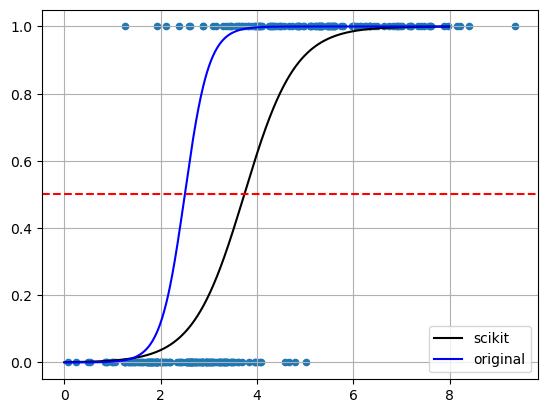

In [59]:
#pp= 1/(1+np.exp(-(b0+b1*poss)))
#pn= 1/(1+np.exp(-(b0+b1*negs)))

#this is the scikit fitted curve
p_sk= 1/(1+np.exp(-(b0+b1*x)))

#below is the original curve
p_or= 1/(1+np.exp(-(-10.0+4.0*x)))

plt.plot(x, p_sk, c="k", label="scikit")
plt.plot(x, p_or, c="b", label="original")
plt.scatter(X_train, y_train, s = 20)
#plt.scatter(poss, yp, s = 20)
#plt.scatter(negs, yn, s = 20)
plt.axhline(.5,  linestyle="--", color="r")
plt.grid()
plt.legend()
plt.show()


Finally we can compare the metrics computing them for the new model, using the test set now

In [60]:
sk_preds=mdl.predict(X_test)
printClassResults(y_test, sk_preds)

The Accuracy is:  0.8551
The Precision is:  0.7778
The Recall is:  0.8400
The F1 score is:  0.8077
The Matthews correlation coefficient is:  0.6930

This is the Confusion Matrix
    0   1
0  38   6
1   4  21


### Discussion

Compare the results obtained and discuss them
    * What to you think is happening in scikit-learn
    * how relevant is the aspect of the curve to the overal statistics. Focus in particular on precision and recall

In [61]:
#Scikit-learn's Behavior: Scikit-learn's logistic regression algorithm optimizes
#parameters to minimize a certain loss function (usually log-loss in logistic regression).
#It uses optimization techniques like gradient descent to find these parameters. 

#The shape of the logistic regression curve is crucial for interpreting the model's behavior, 
#especially in binary classification problems.
#represents the probability of belonging to a certain class given the input features. In terms of precision and recall:

#Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive 
#observations. It measures the accuracy of positive predictions. The curve's shape influences the precision by 
#determining how well the model can separate positive and negative instances based on their predicted probabilities.

#Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class.
#It measures the model's ability to capture all positive instances. The curve's shape influences recall by determining 
#how well the model can classify positive instances above a certain probability threshold.

### 4.2 Scikit-learn example on multidimensional data

Scikit is able to fit logistic regression parameters to multidimensional data and with multiclass objectives. However some care must be taken when there is more than one independent variable. Due to the learning process, it is fundamental that the data is apropriately scaled

Furthermore, now we will use tradidional cross validation to evaluate our models

#### 4.2.1 Scaling data

Due to the process of model fitting it is required that the X matrix has been scaled to 0 mean and variance of 1. Scikit learn has a tool that is able to accomplish this (`StandardScaler`) but we must be careful to maintain a separation between training and testing or the Scaling process will be a source of error.

The correct procedure for scaling data is as follows
1. Separate full data set into training and testing
2. Use the training set to fit the scaler
3. Apply the scaler to the training set (transform)
4. Apply the scaler to the testing set (transform)

We are going to use the Breast Cancer data set from the scikit learn toy data sets

In [62]:
from sklearn.datasets import load_breast_cancer
X_bc,y_bc = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_bc, y_bc, test_size=0.2, random_state=22)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #fit scaler on training set
X_train = scaler.transform(X_train)  #apply scaler on training set
X_test = scaler.transform(X_test) #apply scaler on test set

X_bc.shape

(569, 30)

#### 4.2.2. Fitting the model

Now let's fit the model to the training data properly scaled

In [63]:
mdl= LogisticRegression(random_state=0).fit(X_train, y_train)

We can print the coefficients of the model. Please note that we would require several sets of parameters if the problem is multiclass. For 3 classes we would require 3 parameter sets. This will force us to use a slightly different way to have access to each of the actual model coefficients

Also note that as all variables are centered in zero and with similar variance it is possible to identify the variables that may have strongest impact on the model as these are the ones with higher absolute value on the coeficients

In [64]:
print("The bias is: ",  mdl.intercept_[0])
print("The other parameters are: ")
for i, beta in enumerate(mdl.coef_[0]):
    print("\t B%02d -> %9.3f"% (i+1, beta))


The bias is:  0.6187975852220862
The other parameters are: 
	 B01 ->    -0.570
	 B02 ->    -0.557
	 B03 ->    -0.529
	 B04 ->    -0.538
	 B05 ->    -0.104
	 B06 ->     0.436
	 B07 ->    -0.709
	 B08 ->    -0.861
	 B09 ->     0.022
	 B10 ->     0.552
	 B11 ->    -1.089
	 B12 ->     0.372
	 B13 ->    -0.669
	 B14 ->    -0.919
	 B15 ->    -0.385
	 B16 ->     0.552
	 B17 ->    -0.078
	 B18 ->    -0.194
	 B19 ->     0.524
	 B20 ->     0.791
	 B21 ->    -1.022
	 B22 ->    -1.231
	 B23 ->    -0.805
	 B24 ->    -0.928
	 B25 ->    -0.874
	 B26 ->     0.022
	 B27 ->    -0.831
	 B28 ->    -0.878
	 B29 ->    -0.815
	 B30 ->    -0.491


We may look at the five most influent (those with higher absolute value):

In [65]:
coefs=[(beta,i) for i, beta in enumerate(mdl.coef_[0])]
coefss=sorted(coefs, key=lambda row: np.abs(row[0]))
coefss.reverse()
for beta, i in coefss[:5]:
    print("\t B%02d -> %9.3f"% (i+1, beta))

	 B22 ->    -1.231
	 B11 ->    -1.089
	 B21 ->    -1.022
	 B24 ->    -0.928
	 B14 ->    -0.919


And we can make predictions and evaluation with the test set

In [66]:
preds = mdl.predict(X_test)

printClassResults(y_test, preds)

The Accuracy is:  0.9737
The Precision is:  0.9595
The Recall is:  1.0000
The F1 score is:  0.9793
The Matthews correlation coefficient is:  0.9447

This is the Confusion Matrix
    0   1
0  40   3
1   0  71
